# **Thông tin sinh viên**
MSSV: 20520275

Họ tên: Danh Võ Hồng Phúc 

Bài tập 2

Ngày làm bài: 20/4/2022

# **Mount drive and set path**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
import os
import cv2
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [86]:
dir_monhoc = '/content/drive/MyDrive/CS231.M21.KHTN'

In [87]:
dir_baitap = os.path.join(dir_monhoc, 'Baitap', 'Baitap2')
dir_images = os.path.join(dir_baitap, 'images')

# **Yêu cầu 1**

***Ảnh Bicycle***

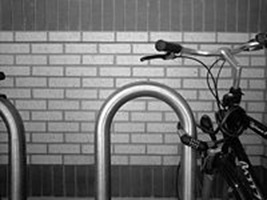

In [89]:
path_filename = os.path.join(dir_images,'Bicycle.jpg')
img = cv2.imread(path_filename,0)
cv2_imshow(img)

In [68]:
from scipy import ndimage

def sobel_filters(img):
    Hx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
    Hy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]],np.float32)

    Ix = cv2.filter2D(img, -1, Hx)
    Iy = cv2.filter2D(img, -1, Hy)

    G = np.hypot(Ix,Iy)
    G = np.array(G/G.max()*255, np.uint8)
    theta = np.arctan2(Iy,Ix)
    return Ix,Iy,G,theta

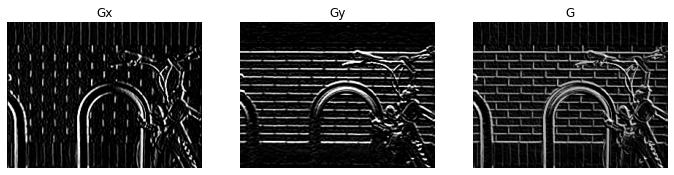

In [69]:
Gx, Gy, G, theta = sobel_filters(img)
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.title("Gx")
plt.axis('off')
plt.imshow(Gx, cmap='gray')

plt.subplot(1,4,2)
plt.title("Gy")
plt.axis('off')
plt.imshow(Gy, cmap='gray')

plt.subplot(1, 4, 3)
plt.title("G")
plt.axis('off')
plt.imshow(G, cmap='gray')


plt.show()

***Ảnh Bansoxe***

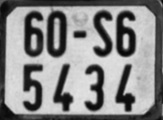

In [96]:
path_filename = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap2/images/bansoxe.jpg'
img = cv2.imread(path_filename,0)
cv2_imshow(img)

Text(0.5, 1.0, 'G Image')

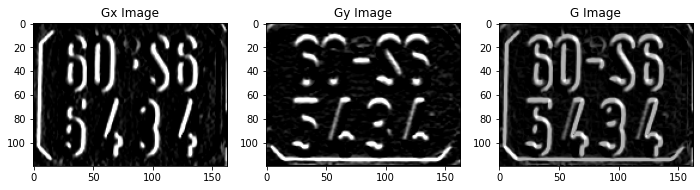

In [101]:
Gx, Gy, G, theta = sobel_filters(img)

imgd = sobel_filters(img)

plt.figure(figsize = (16, 4))

plt.subplot(1, 4, 1)
plt.imshow(Gx,cmap='gray')
plt.title('Gx Image')

plt.subplot(1, 4, 2)
plt.imshow(Gy,cmap='gray')
plt.title('Gy Image')

plt.subplot(1, 4,3)
plt.imshow(G,cmap='gray')
plt.title('G Image')

# **Yêu cầu 2**

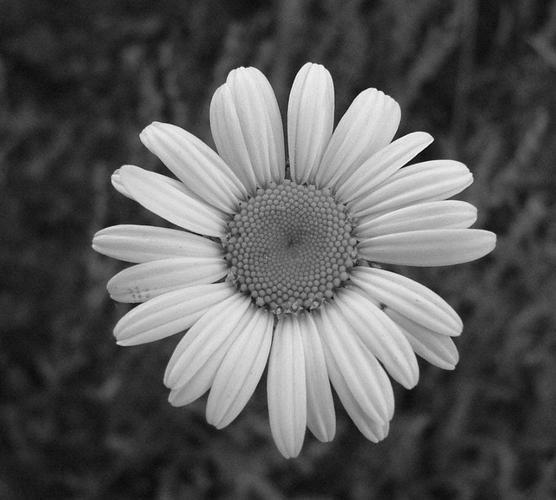

In [112]:
path_filename = os.path.join(dir_images,'image_0814.jpg')
img_0814 = cv2.imread(path_filename,0)
cv2_imshow(img_0814)

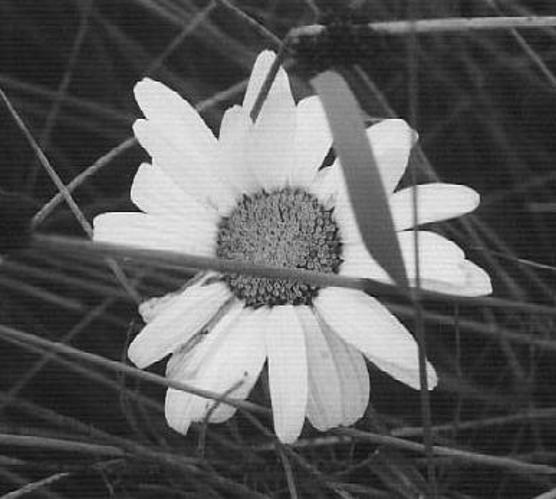

In [113]:
path_filename = os.path.join(dir_images,'image_0816.jpg')
img_0816 = cv2.imread(path_filename,0)
cv2_imshow(img_0816)

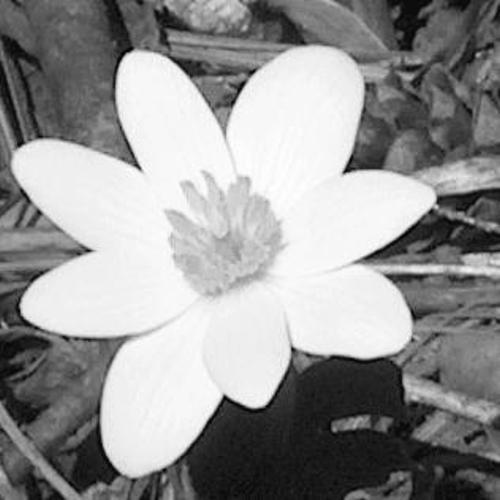

In [114]:
path_filename = os.path.join(dir_images,'image_1248.jpg')
img_1248 = cv2.imread(path_filename,0)
cv2_imshow(img_1248)

In [110]:
def calFeartureVector(img_src):
  img_dst = img_src.copy()
  img_dst = cv2.resize(img_dst, (256, 256))
  Ix, Iy, G, theta = sobel_filters(img_dst)
  feature = []
  for i in range(G.shape[0]):
    tmp = 0
    for j in range(G.shape[1]):
      tmp = tmp + G[i,j]
      feature.append(tmp)
  for j in range(G.shape[1]):
    tmp = 0
    for i in range(G.shape[0]):
      tmp = tmp + G[i,j]
      feature.append(tmp)
  return feature

***Khoảng cánh Euclidean***

Giữa image0814 và image0816

In [115]:
distance.euclidean(calFeartureVector(img_0814), calFeartureVector(img_0816))

559911.4941140251

Giữa image0814 và image1248

In [116]:
distance.euclidean(calFeartureVector(img_0814), calFeartureVector(img_1248))

925655.6859756224

***Tương đồng Cosine***

Giữa image0814 và image0816

In [117]:
1 - distance.cosine(calFeartureVector(img_0814), calFeartureVector(img_0816))

0.9272023944396804

Giữa image0814 và image1248

In [118]:
1 - distance.cosine(calFeartureVector(img_0814), calFeartureVector(img_1248))

0.7709202219784477